In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

Write

In [108]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets

# The digits dataset
#digits = datasets.load_digits()
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [109]:
x_train.shape

(60000, 28, 28)

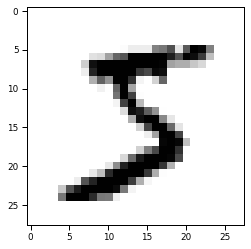

In [112]:
plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [125]:
# Gather all the three's
threes = x_train[y_train == 3]
vectorized_threes = threes.reshape((threes.shape[0], threes.shape[1] * threes.shape[2]))
#threes = digits['data']

In [126]:
# Perform PCA on the threes
from sklearn.decomposition import PCA

In [178]:
pca = PCA(n_components=0.98, whiten=True).fit(vectorized_threes)

In [179]:
pca.n_components_

227

Text(0, 0.5, '$\\lambda_i$')

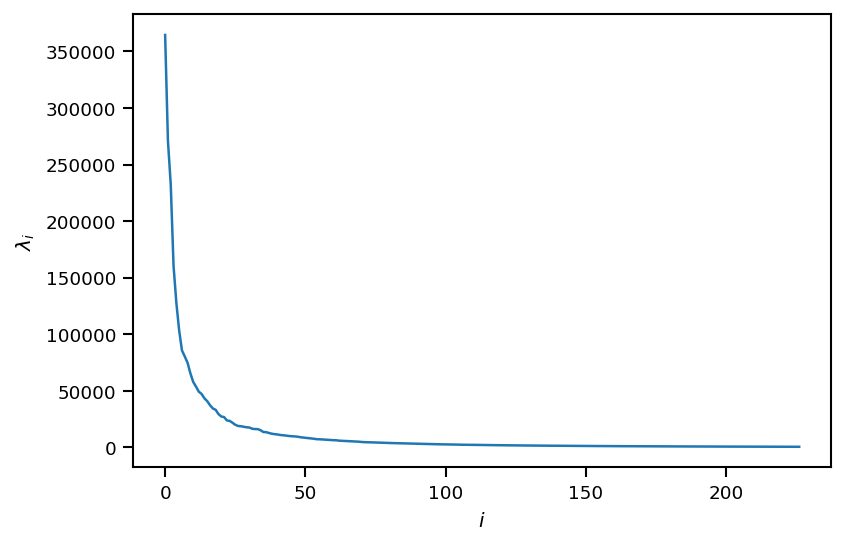

In [202]:
fig, ax = plt.subplots(dpi=150)
ax.plot(pca.explained_variance_)
ax.set_xlabel('$i$')
ax.set_ylabel(r'$\lambda_i$')

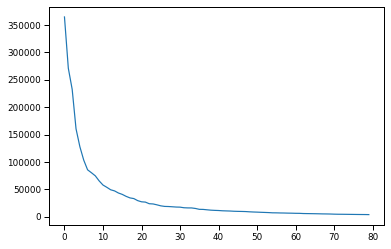

In [131]:
plt.plot(pca.explained_variance_)

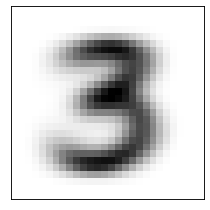

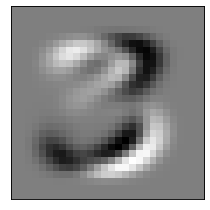

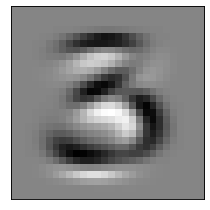

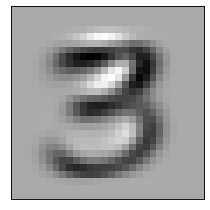

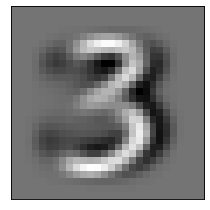

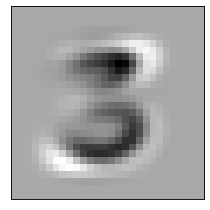

In [181]:
fig, ax = plt.subplots(dpi=64)
ax.imshow(pca.mean_.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
    
for i in range(5):
    fig, ax = plt.subplots(dpi=64)
    ax.imshow(pca.components_[i, :].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

Text(0, 0.5, '$z_2$')

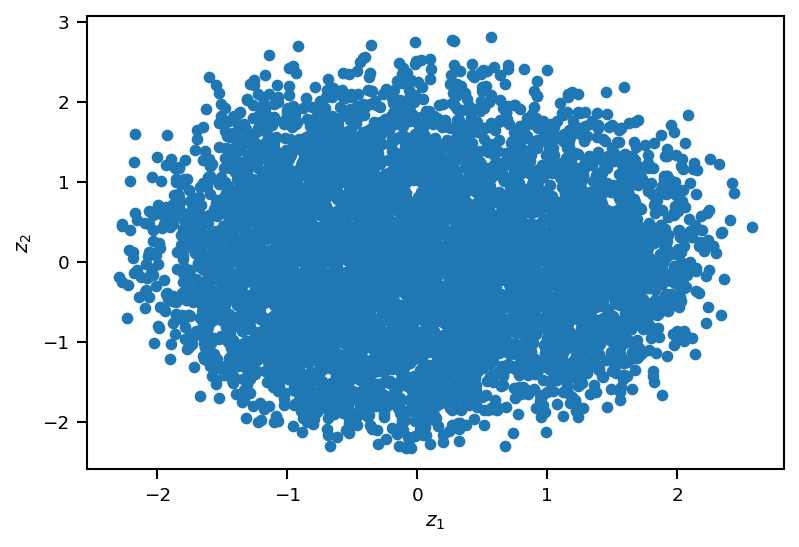

In [182]:
fig, ax = plt.subplots(dpi=150)
Z = pca.transform(vectorized_threes)
ax.scatter(Z[:, 0], Z[:, 1])
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

In [228]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
def imscatter(x, y, images, cmap=plt.cm.gray_r, ax=None, zoom=1):
    #if ax is None:
    #    ax = plt.gca()
    #try:
    #    image = plt.imread(image)
    #except TypeError:
    #    # Likely already an array...
    #    pass
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, images):
        im = OffsetImage(image, zoom=zoom, cmap=cmap, interpolation='nearest')
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

Text(0, 0.5, '$z_2$')

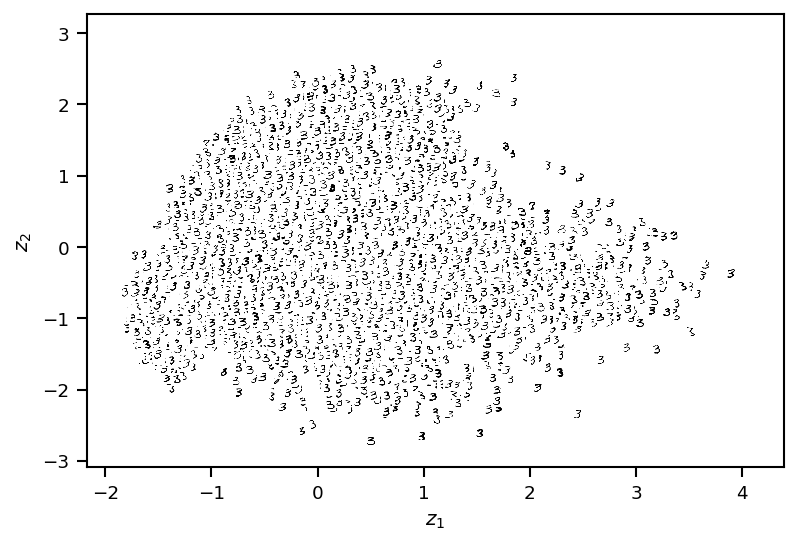

In [230]:
fig, ax = plt.subplots(dpi=150)
imscatter(Z[:, 0], Z[:, 1], threes, ax=ax, zoom=0.2)
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

In [183]:
pca.singular_values_

array([47268.26675671, 40751.95865198, 37754.64910063, 31365.21841448,
       27991.60507639, 25173.5564412 , 22923.7785877 , 22199.74082746,
       21412.45845936, 20043.11022088, 18848.90442584, 18159.99947647,
       17382.04961308, 17023.54887538, 16319.10928455, 15837.57975514,
       15127.8521838 , 14544.80192875, 14281.90983697, 13460.6550613 ,
       12958.01438392, 12830.78661012, 12102.39355436, 11996.32881368,
       11578.23573982, 11081.1472188 , 10790.62360975, 10729.77486598,
       10597.46978701, 10453.45900922, 10401.07925735, 10077.45150752,
        9982.06995767,  9964.48299106,  9668.00291688,  9152.5288184 ,
        9102.57517069,  8861.61597827,  8626.5634168 ,  8491.61543048,
        8398.38670888,  8220.46608143,  8129.741562  ,  8045.36928964,
        7891.32656398,  7809.62990968,  7752.83757565,  7672.41465573,
        7489.0007449 ,  7345.65320523,  7242.45709246,  7110.34032587,
        7000.03890961,  6878.17174834,  6693.42456504,  6664.87345442,
      

In [203]:
from ipywidgets import interactive
def visualize_pca_component(i=0, z=0.0):
    fig, ax = plt.subplots(dpi=64)
    x = pca.mean_ + z * np.sqrt(pca.explained_variance_[i]) * pca.components_[i]
    ax.imshow(x.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
interactive(visualize_pca_component, i=[0, 1, 2, 3], z=np.linspace(-2.0, 2.0, 100))

interactive(children=(Dropdown(description='i', options=(0, 1, 2, 3), value=0), Dropdown(description='z', opti…

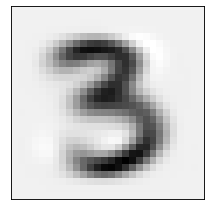

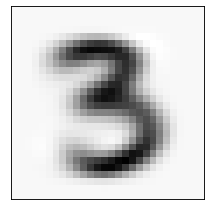

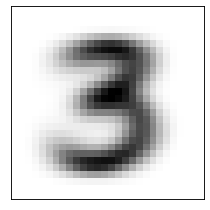

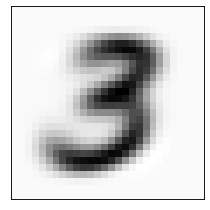

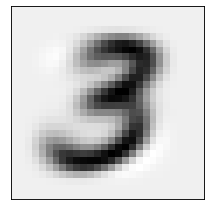

In [206]:
visualize_pca_component(0, -1.2);
visualize_pca_component(0, -1.0);
visualize_pca_component(0, -0.0);
visualize_pca_component(0, 1.0);
visualize_pca_component(0, 1.2);

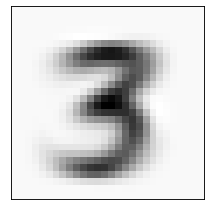

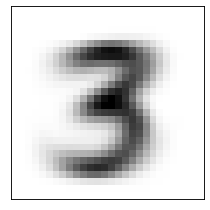

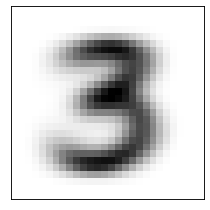

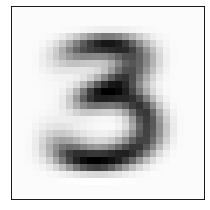

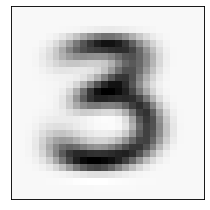

In [207]:
visualize_pca_component(1, -1.2);
visualize_pca_component(1, -1.0);
visualize_pca_component(1, -0.0);
visualize_pca_component(1, 1.0);
visualize_pca_component(1, 1.2);

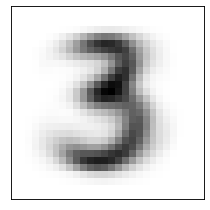

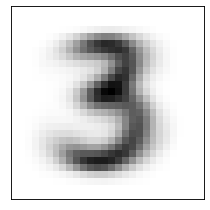

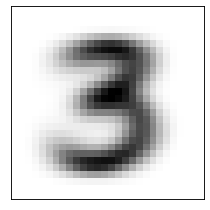

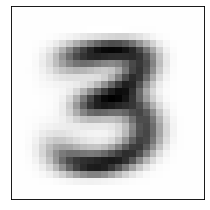

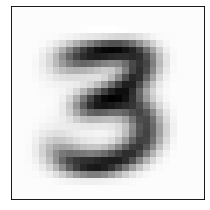

In [210]:
visualize_pca_component(2, -1.2);
visualize_pca_component(2, -1.0);
visualize_pca_component(2, -0.0);
visualize_pca_component(2, 1.0);
visualize_pca_component(2, 1.2);

In [165]:
# Reconstruction error
valid_threes = x_test[y_test==3]

In [166]:
valid_threes.shape

(1010, 28, 28)

In [186]:
# reduce
vectorized_valid_threes = valid_threes.reshape(valid_threes.shape[0], valid_threes.shape[1] * valid_threes.shape[2])
Z_valid = pca.transform(vectorized_valid_threes)


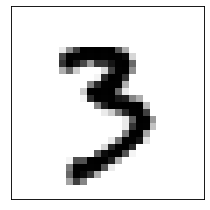

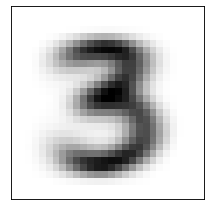

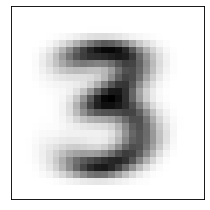

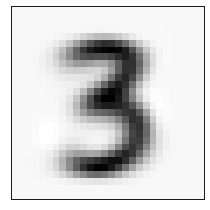

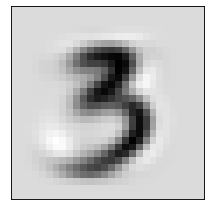

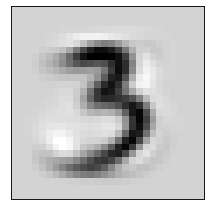

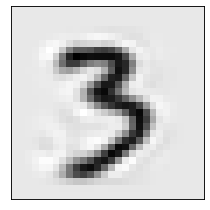

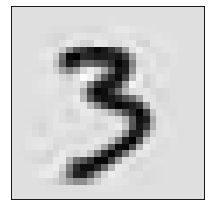

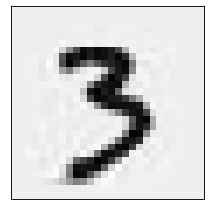

In [189]:
# Reconstruct a few with different number of components
idx = 1
fig, ax = plt.subplots(dpi=64)
ax.imshow(valid_threes[idx], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
for d in [1, 2, 4, 8, 16, 64, 128, 227]:
    x = pca.inverse_transform(np.hstack([Z_valid[idx][:d], np.zeros((Z_valid.shape[1] - d,))]))
    fig, ax = plt.subplots(dpi=64)
    ax.imshow(x.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

In [199]:
np.sum(pca.singular_values_) + pca.noise_variance_

1364604.5002678102

In [195]:
np.sum(pca.explained_variance_)

2864882.051818294

In [298]:
# ALL DATA
vectorized_x_train = x_train.reshape((x_train.shape[0], 28 * 28))
pca = PCA(n_components=3, whiten=True).fit(vectorized_x_train)

In [278]:
pca.n_components_

2

Text(0, 0.5, '$z_2$')

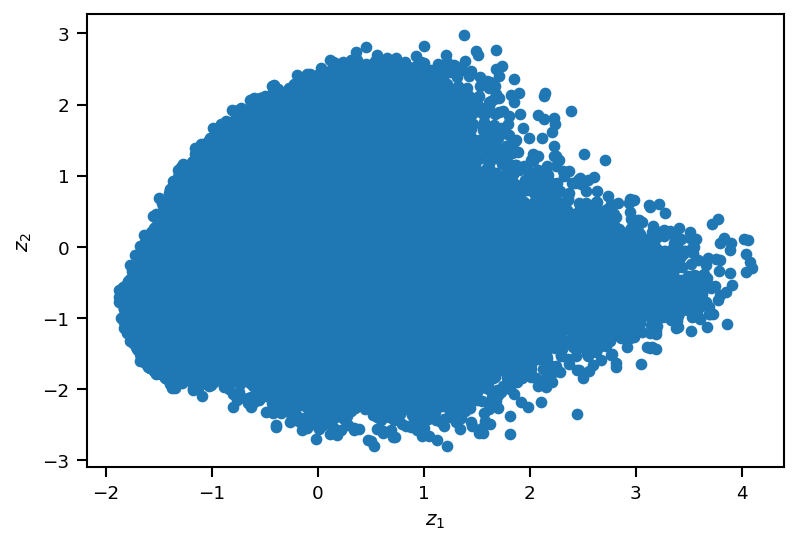

In [299]:
fig, ax = plt.subplots(dpi=150)
Z = pca.transform(vectorized_x_train)
ax.scatter(Z[:, 0], Z[:, 1])
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

Text(0, 0.5, '$z_2$')

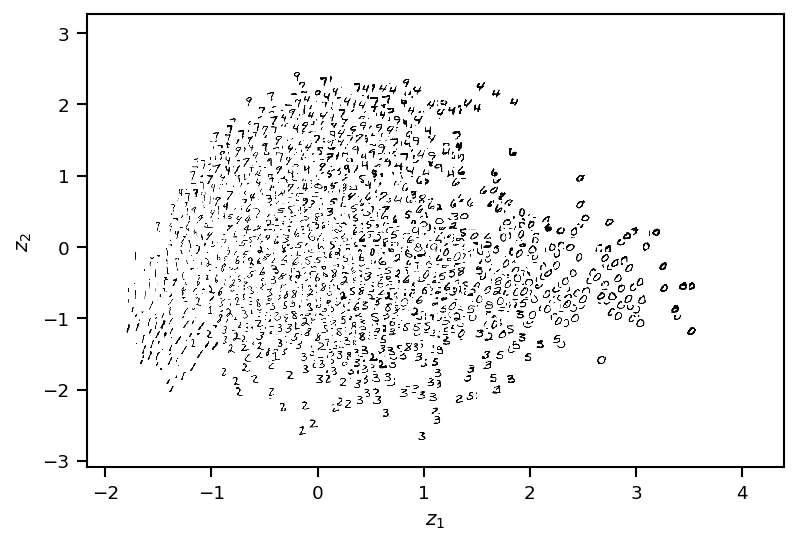

In [283]:
fig, ax = plt.subplots(dpi=150)
imscatter(Z[:, 0], Z[:, 1], x_train[:3000], ax=ax, zoom=0.2)
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

In [280]:
from sklearn.cluster import KMeans

In [300]:
cl = KMeans(n_clusters=10).fit(Z)

In [227]:
cl.labels_

array([0, 8, 9, ..., 0, 6, 0], dtype=int32)

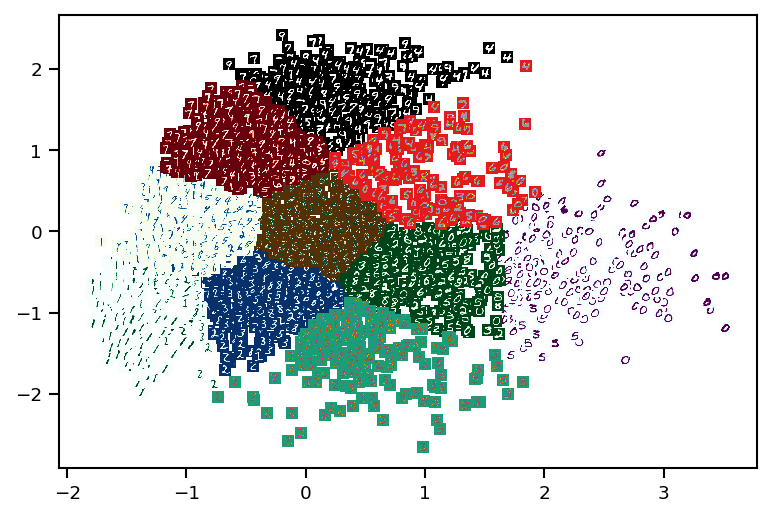

In [288]:
fig, ax = plt.subplots(dpi=150)
for i, c in zip(range(10), ['Greys_r', 'Blues_r', 'BrBG', 'BuGn', 'BuPu', 'Greens_r', 'Dark2', 'GnBu',
                           'Reds_r', 'Set1', 'Spectral']):
    idx = cl.labels_[:3000] == i
    imscatter(Z[:3000][idx, 0], Z[:3000][idx, 1], x_train[:3000][idx], cmap=c, ax=ax, zoom=0.2);

In [293]:
cl.cluster_centers_

array([[ 0.21964569,  1.7228111 ],
       [-0.31057142, -0.77262991],
       [ 0.126057  ,  0.04123151],
       [-1.46264412, -0.95799637],
       [ 2.28263457, -0.48524957],
       [ 0.9876312 , -0.51808351],
       [ 0.44465144, -1.53063526],
       [-0.94743869,  0.0667614 ],
       [-0.53491254,  1.08775766],
       [ 0.99079743,  0.68519847]])

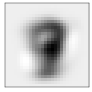

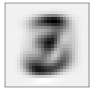

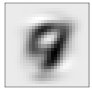

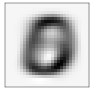

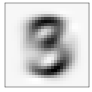

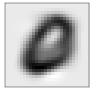

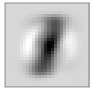

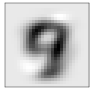

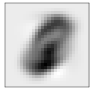

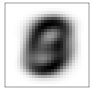

In [301]:
# What do the cluster means look like?
for i in range(10):
    fig, ax = plt.subplots(dpi=28)
    ax.imshow(pca.inverse_transform(cl.cluster_centers_[i:(i+1), :]).reshape((28,28)),
                                    cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

In [266]:
from sklearn.mixture import GaussianMixture

In [303]:
threes_only = x_train[y_train == 3]
vectorized_threes = threes_only.reshape((threes_only.shape[0], 28 * 28))
print(vectorized_threes.shape)

(6131, 784)


In [370]:
pca3 = PCA(n_components=2, whiten=True).fit(vectorized_threes)

In [371]:
Z3 = pca3.transform(vectorized_threes)

In [387]:
# Train with different number of components and estimate BIC
bics = []
models = []
for nc in range(1, 10):
    m = GaussianMixture(n_components=nc).fit(Z3)
    bics.append(m.bic(Z3))
    models.append(m)
bics = np.array(bics)

Text(0.5, 0, 'Number of components')

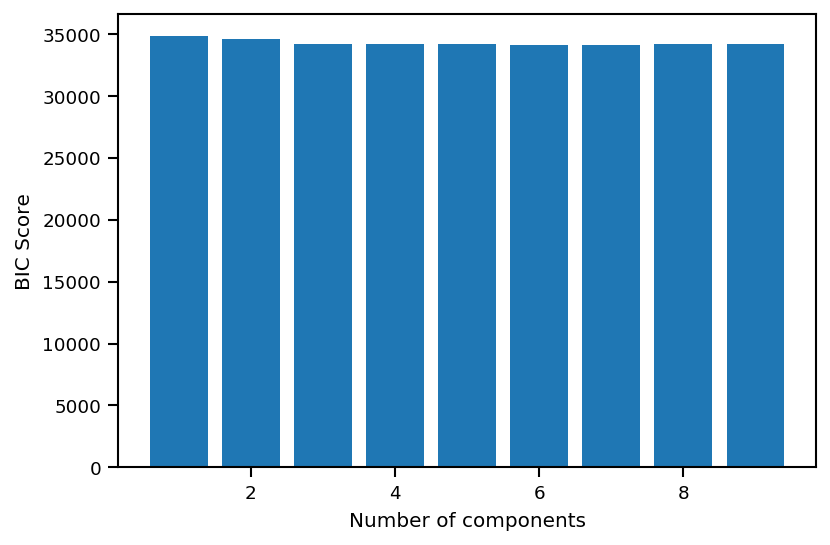

In [388]:
fig, ax = plt.subplots(dpi=150)
ax.bar(range(1, 10), bics)
ax.set_ylabel('BIC Score')
ax.set_xlabel('Number of components')

In [391]:
model = models[np.argmin(bics)]

In [392]:
labels = model.predict(Z3)

In [393]:
labels

array([3, 1, 0, ..., 3, 2, 2])

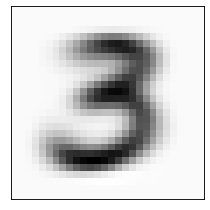

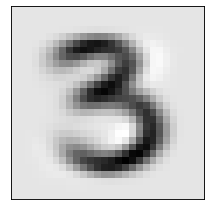

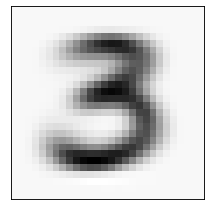

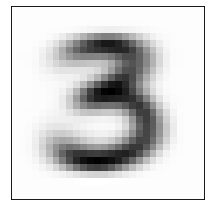

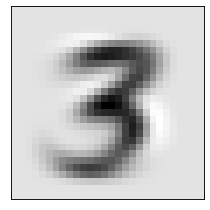

In [394]:
for i in range(5):
    z = model.sample()[0]
    x = pca3.inverse_transform(z[None, :])
    fig, ax = plt.subplots(dpi=64)
    ax.imshow(x.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

Text(0, 0.5, '$x_2$')

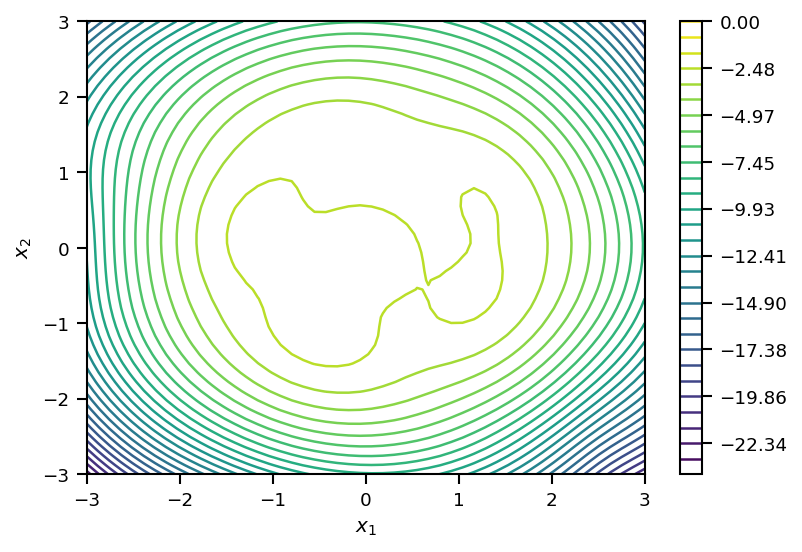

In [403]:
x = np.linspace(-3., 3.)
y = np.linspace(-3., 3.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(dpi=150)
#imscatter(Z3[:,0], Z3[:,1], threes_only, cmap=plt.cm.gray_r, ax=ax, zoom=0.2);
c = ax.contour(X, Y, Z, levels=np.linspace(-24, 0.0, 30))
plt.colorbar(c)
#plt.scatter(data[:, 0], data[:, 1])

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')